In [1]:
import pandas as pd
from sklearn import preprocessing
import time
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

In [2]:
import LogisticRegressionModules as lrm

**Vocabulary Size Experiment**
<br>
Using no preprocessing, no cropping, and tf-idf vectorizer

Vocab Size:500
Accuracy:0.8871349644830308, Precision:0.9003067484662577, Recall:0.8827067669172932, F1_Score:0.8914198936977981
Time:9s
-------------------------------------------
Vocab Size:1000
Accuracy:0.9052880820836622, Precision:0.9248466257668712, Recall:0.8946587537091988, F1_Score:0.9095022624434388
Time:9s
-------------------------------------------
Vocab Size:1500
Accuracy:0.9100236779794791, Precision:0.9187116564417178, Recall:0.9075757575757576, F1_Score:0.913109756097561
Time:11s
-------------------------------------------
Vocab Size:2000
Accuracy:0.9155485398579322, Precision:0.9263803680981595, Recall:0.9110105580693816, F1_Score:0.9186311787072244
Time:11s
-------------------------------------------
Vocab Size:2500
Accuracy:0.9131807419100236, Precision:0.9233128834355828, Recall:0.9093655589123867, F1_Score:0.9162861491628616
Time:12s
-------------------------------------------
[500, 1000, 1500, 2000, 2500]
[0.8871349644830308, 0.9052880820836622, 0.9100236779794791

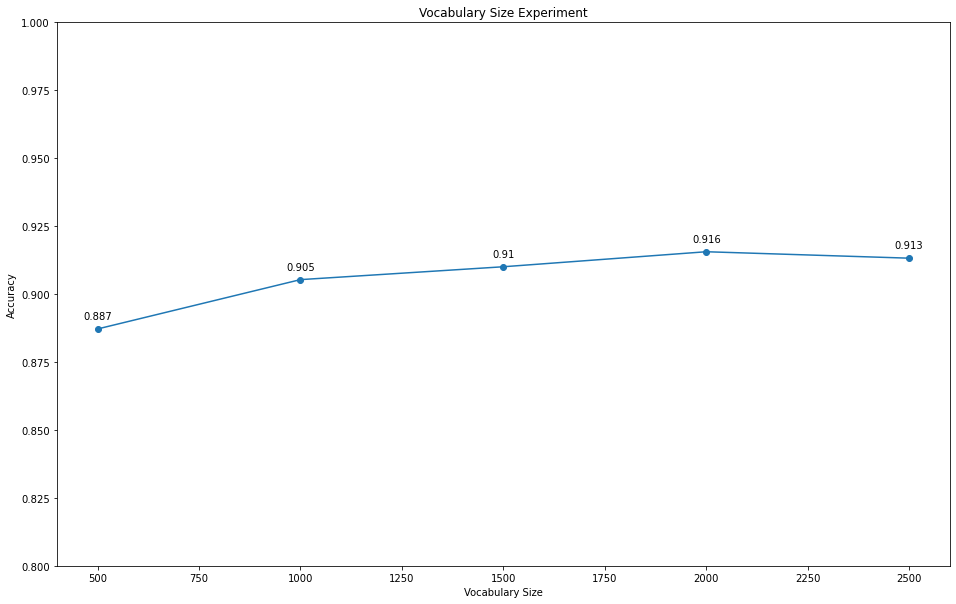

In [3]:
vocab_size = [500,1000,1500,2000,2500]

dataframe = pd.read_csv('./data/fake_or_real_news.csv')
dataset = (dataframe['title'] + ' ' + dataframe['text']).to_numpy()

le = preprocessing.LabelEncoder() 
le.fit(dataframe['label']) 
y_binary = le.transform(dataframe['label'])

accuracy_list = []
# specifying the vocab size is equivalent to specifying the max features in the vectorizer
for max_features in vocab_size:
    epoch_time_start = int(time.time())
    print('Vocab Size:' + str(max_features))
    
    X_data = lrm.fit_vectorizer(dataset, vec_type="tfidf", max_features=max_features)
    
    accuracy = lrm.run_default_logistic_regression(X_data,y_binary)
    accuracy_list.append(accuracy)
    
    epoch_time_end = int(time.time())
    print('Time:' +str(epoch_time_end-epoch_time_start)+'s')
    print('-------------------------------------------')
    
print(vocab_size)
print(accuracy_list)

plt.figure(figsize=(16, 10))
plt.xlabel('Vocabulary Size')
plt.ylabel('Accuracy')
plt.ylim(0.8,1)
plt.title('Vocabulary Size Experiment')
plt.plot(vocab_size,accuracy_list, marker='o')
for x,y in zip(vocab_size,accuracy_list):
    label = f"{round(y,3)}"
    plt.annotate(label, (x,y), textcoords="offset points", 
                 xytext=(0,10), ha='center') 
plt.savefig('plots/vocab_size')

**Cropping Experiment**
<br>
Using no preprocessing, and tf-idf vectorizer with vocab_size = 1500

Percent to keep:20.0%
Accuracy:0.8816101026045777, Precision:0.8880368098159509, Recall:0.8826219512195121, F1_Score:0.8853211009174311
Time:10s
-------------------------------------------
Percent to keep:40.0%
Accuracy:0.8926598263614838, Precision:0.897239263803681, Recall:0.8944954128440367, F1_Score:0.895865237366003
Time:12s
-------------------------------------------
Percent to keep:60.0%
Accuracy:0.8981846882399369, Precision:0.9079754601226994, Recall:0.8956127080181543, F1_Score:0.9017517136329017
Time:13s
-------------------------------------------
Percent to keep:80.0%
Accuracy:0.9052880820836622, Precision:0.911042944785276, Recall:0.9054878048780488, F1_Score:0.9082568807339448
Time:15s
-------------------------------------------
Percent to keep:100%
Accuracy:0.9100236779794791, Precision:0.9187116564417178, Recall:0.9075757575757576, F1_Score:0.913109756097561
Time:17s
-------------------------------------------
[0.2, 0.4, 0.6, 0.8, 1]
[0.8816101026045777, 0.8926598263614

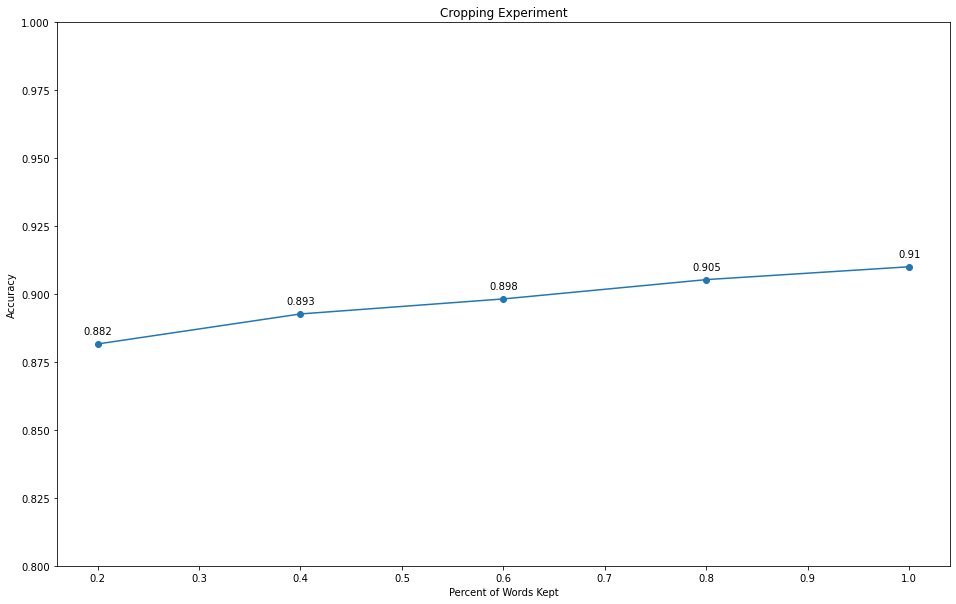

In [4]:
perc_to_keep = [0.20,0.40,0.60,0.80,1]

dataframe = pd.read_csv('./data/fake_or_real_news.csv')
le = preprocessing.LabelEncoder() 
le.fit(dataframe['label']) 
y_binary = le.transform(dataframe['label'])

accuracy_list = []
for perc in perc_to_keep:
    epoch_time_start = int(time.time())
    print('Percent to keep:' + str(perc*100) + '%')
    
    dataframe['crop_text'] = dataframe.apply(lambda row: lrm.crop(row['text'],perc), axis=1)
    dataset = (dataframe['title'] + ' ' + dataframe['crop_text']).to_numpy()
    X_data = lrm.fit_vectorizer(dataset, vec_type="tfidf", max_features=1500)
    
    accuracy = lrm.run_default_logistic_regression(X_data,y_binary)
    accuracy_list.append(accuracy)
    epoch_time_end = int(time.time())
    print('Time:' +str(epoch_time_end-epoch_time_start)+'s')
    print('-------------------------------------------')
print(perc_to_keep)
print(accuracy_list)

plt.figure(figsize=(16, 10))
plt.xlabel('Percent of Words Kept')
plt.ylabel('Accuracy')
plt.ylim(0.8,1)
plt.title('Cropping Experiment')
plt.plot(perc_to_keep,accuracy_list, marker='o')
for x,y in zip(perc_to_keep,accuracy_list):
    label = f"{round(y,3)}"
    plt.annotate(label, (x,y), textcoords="offset points", 
                 xytext=(0,10), ha='center') 
plt.savefig('plots/cropping')

**Best vectorization technique**
<br>
Using no preprocessing, no cropping, and vocab_size = 2000

Vectorizer:binary
Accuracy:0.9116022099447514, Precision:0.9125766871165644, Recall:0.9153846153846154, F1_Score:0.9139784946236559
Time:13s
-------------------------------------------
Vectorizer:counts
Accuracy:0.8910812943962115, Precision:0.9079754601226994, Recall:0.8835820895522388, F1_Score:0.8956127080181544
Time:12s
-------------------------------------------
Vectorizer:tfidf
Accuracy:0.9155485398579322, Precision:0.9263803680981595, Recall:0.9110105580693816, F1_Score:0.9186311787072244
Time:10s
-------------------------------------------
['binary', 'counts', 'tfidf']
[0.9116022099447514, 0.8910812943962115, 0.9155485398579322]


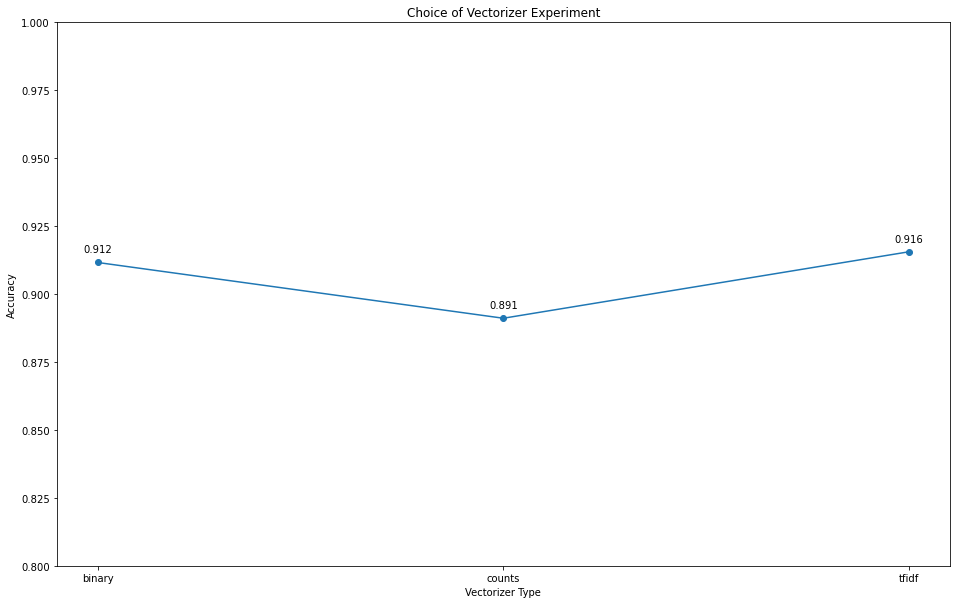

In [5]:
vectorizer_type = ['binary','counts','tfidf']

dataframe = pd.read_csv('./data/fake_or_real_news.csv')
dataset = (dataframe['title'] + ' ' + dataframe['text']).to_numpy()

le = preprocessing.LabelEncoder() 
le.fit(dataframe['label']) 
y_binary = le.transform(dataframe['label'])

accuracy_list = []
for vectorizer in vectorizer_type:
    epoch_time_start = int(time.time())
    print('Vectorizer:' + vectorizer)
    
    X_data = lrm.fit_vectorizer(dataset, vec_type=vectorizer, max_features=2000)
    
    accuracy = lrm.run_default_logistic_regression(X_data,y_binary)
    accuracy_list.append(accuracy)
    epoch_time_end = int(time.time())
    print('Time:' +str(epoch_time_end-epoch_time_start)+'s')
    print('-------------------------------------------')
print(vectorizer_type)
print(accuracy_list)

plt.figure(figsize=(16, 10))
plt.xlabel('Vectorizer Type')
plt.ylabel('Accuracy')
plt.ylim(0.8,1)
plt.title('Choice of Vectorizer Experiment')
plt.plot(vectorizer_type,accuracy_list, marker='o')
for x,y in zip(vectorizer_type,accuracy_list):
    label = f"{round(y,3)}"
    plt.annotate(label, (x,y), textcoords="offset points", 
                 xytext=(0,10), ha='center') 
plt.savefig('plots/vectorization')

**Pre-processing vs. no Pre-processing Experiment**
<br>
Using no cropping, and tfidf with vocab_size = 1500

Preprocessing:Yes
Preprocessing dataset
Completed Preprocessing dataset
Accuracy:0.9116022099447514, Precision:0.9171779141104295, Recall:0.9115853658536586, F1_Score:0.9143730886850153
Time:250s
-------------------------------------------
Preprocessing:No
Accuracy:0.9100236779794791, Precision:0.9187116564417178, Recall:0.9075757575757576, F1_Score:0.913109756097561
Time:7s
-------------------------------------------
['Yes', 'No']
[0.9116022099447514, 0.9100236779794791]


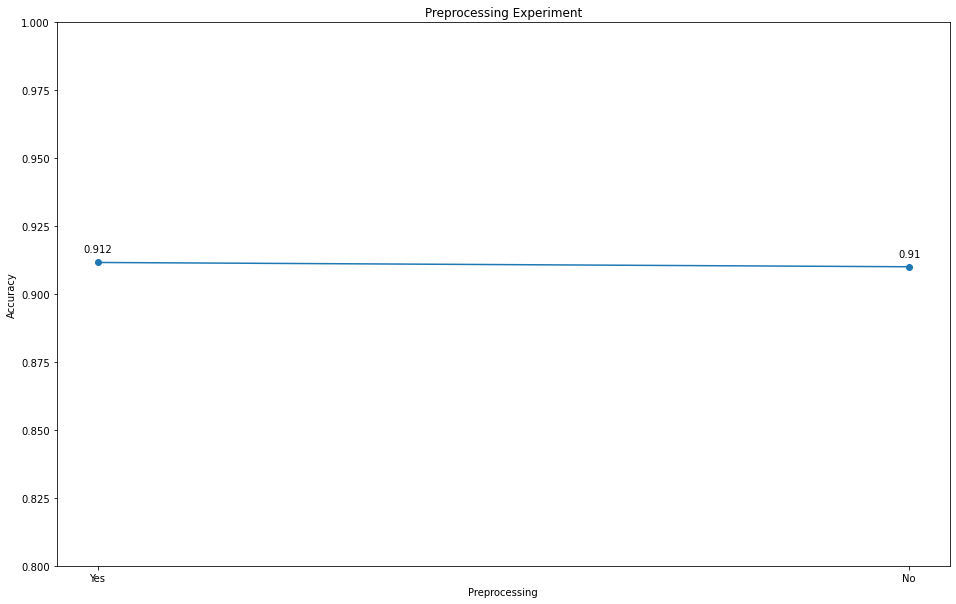

In [6]:
dataframe = pd.read_csv('./data/fake_or_real_news.csv')
dataset = (dataframe['title'] + ' ' + dataframe['text']).to_numpy()

le = preprocessing.LabelEncoder() 
le.fit(dataframe['label']) 
y_binary = le.transform(dataframe['label'])

accuracy_list = []
epoch_time_start = int(time.time())
print('Preprocessing:Yes')
print('Preprocessing dataset')
preprocessed_dataset = lrm.pre_processing(dataset)
print('Completed Preprocessing dataset')
X_data = lrm.fit_vectorizer(preprocessed_dataset, vec_type='tfidf', max_features=1500)

accuracy = lrm.run_default_logistic_regression(X_data,y_binary)
accuracy_list.append(accuracy)
epoch_time_end = int(time.time())
print('Time:' +str(epoch_time_end-epoch_time_start)+'s')
print('-------------------------------------------')
epoch_time_start = int(time.time())
print('Preprocessing:No')

X_data = lrm.fit_vectorizer(dataset, vec_type='tfidf', max_features=1500)

accuracy = lrm.run_default_logistic_regression(X_data,y_binary)
accuracy_list.append(accuracy)
epoch_time_end = int(time.time())
print('Time:' +str(epoch_time_end-epoch_time_start)+'s')
print('-------------------------------------------')
preprocessing_list = ['Yes','No']
print(preprocessing_list)
print(accuracy_list)

plt.figure(figsize=(16, 10))
plt.xlabel('Preprocessing')
plt.ylabel('Accuracy')
plt.ylim(0.8,1)
plt.title('Preprocessing Experiment')
plt.plot(preprocessing_list,accuracy_list, marker='o')
for x,y in zip(preprocessing_list,accuracy_list):
    label = f"{round(y,3)}"
    plt.annotate(label, (x,y), textcoords="offset points", 
                 xytext=(0,10), ha='center') 
plt.savefig('plots/preprocessing')

**GridSearch**
<br>
Vocab_size = 2000; Cropping = None; Vectorization = tfidf; Preprocessing = Yes

In [7]:
X_data = lrm.fit_vectorizer(preprocessed_dataset, vec_type='tfidf', max_features=2000)

le = preprocessing.LabelEncoder() 
le.fit(dataframe['label']) 
y_binary = le.transform(dataframe['label'])

clf = LogisticRegression(max_iter=10000, random_state=10)

C = [0.01, 0.1, 1, 10, 100]
solver = ['newton-cg','lbfgs','liblinear','sag','saga']

grid = dict(C=C, solver=solver)
grid_search = GridSearchCV(estimator=clf, param_grid=grid, n_jobs=-1, scoring='accuracy', error_score=0, verbose=3)

grid_result = grid_search.fit(X_data, y_binary)

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))


Fitting 5 folds for each of 25 candidates, totalling 125 fits
Best: 0.928966 using {'C': 10, 'solver': 'lbfgs'}
0.840410 (0.007675) with: {'C': 0.01, 'solver': 'newton-cg'}
0.840410 (0.007675) with: {'C': 0.01, 'solver': 'lbfgs'}
0.848461 (0.006393) with: {'C': 0.01, 'solver': 'liblinear'}
0.840410 (0.007461) with: {'C': 0.01, 'solver': 'sag'}
0.840410 (0.007675) with: {'C': 0.01, 'solver': 'saga'}
0.886977 (0.003133) with: {'C': 0.1, 'solver': 'newton-cg'}
0.886977 (0.003133) with: {'C': 0.1, 'solver': 'lbfgs'}
0.888240 (0.003181) with: {'C': 0.1, 'solver': 'liblinear'}
0.886977 (0.003133) with: {'C': 0.1, 'solver': 'sag'}
0.886977 (0.003133) with: {'C': 0.1, 'solver': 'saga'}
0.920600 (0.005226) with: {'C': 1, 'solver': 'newton-cg'}
0.920442 (0.005245) with: {'C': 1, 'solver': 'lbfgs'}
0.920442 (0.005245) with: {'C': 1, 'solver': 'liblinear'}
0.920600 (0.005226) with: {'C': 1, 'solver': 'sag'}
0.920600 (0.005226) with: {'C': 1, 'solver': 'saga'}
0.928808 (0.006667) with: {'C': 10, 's

**Run Logistic Regression with Best Results from GridSearch**
<br>
Vocab_size = 2000; Cropping = None; Vectorization = tfidf; Preprocessing = Yes
<br>
Best hyperparameters from GridSearch: C=10; solver='saga'

In [8]:
X_data,vocab = lrm.fit_vectorizer_v2(preprocessed_dataset, vec_type='tfidf', max_features=2000)

le = preprocessing.LabelEncoder() 
le.fit(dataframe['label']) 
y_binary = le.transform(dataframe['label'])

X_train, X_test, y_train, y_test = train_test_split(X_data, y_binary, test_size = 0.2, random_state = 0)
    
clf = LogisticRegression(max_iter=10000, C=10, solver='saga', random_state = 10)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
TP = cm[1][1]
TN = cm[0][0]
FP = cm[1][0]
FN = cm[0][1]

Accuracy = (TP + TN) / (TP + TN + FP + FN) 
Precision = TP / (TP + FP)
Recall = TP / (TP + FN)
F1_Score = 2 * Precision * Recall / (Precision + Recall)

print('Accuracy:' + str(Accuracy) + ', Precision:' + str(Precision) 
      + ', Recall:' + str(Recall)+ ', F1_Score:' + str(F1_Score))

Accuracy:0.920284135753749, Precision:0.9340490797546013, Recall:0.9130434782608695, F1_Score:0.9234268385140257


**Interpreting Results of Logistic Regression**

In [9]:
keys = vocab.keys()
values = vocab.values()

df = pd.DataFrame(
    {'keys': keys
    })

df['coef'] = clf.coef_[0]

df.to_csv('interpret_test_v2.csv',index=False)

Get the top 30 words that contributed to the negative class:

In [10]:
df_negative = df.sort_values(by='coef',ascending=True).head(30).copy()
df_negative['coef'] = (df_negative['coef']*-100).astype(int)
print(df_negative)
df_negative.to_csv('Interpret_Negative_Result.csv',index=False)

          keys  coef
26       retir  1034
1245      sell   937
288      expos   783
1670   abandon   725
171     bureau   723
1230       are   668
1622      earn   621
864   challeng   594
1893    carter   565
81     struggl   549
642       more   549
1877     cuban   537
1858    regard   529
1244   compani   522
884     repres   501
1176      book   485
450      visit   485
1385    factor   477
519    primari   468
1346    sector   453
579   michigan   445
1789     syria   444
1247       add   438
608   momentum   431
1343    bottom   427
1228        26   424
1956    climat   412
32       parti   407
392   colleagu   402
34     exactli   395


In [11]:
## EXTRA CODE USED FOR GENERATING NEGATIVE CLASS WORDCLOUD
# master_negative_list = []
# for index,row in df_negative.iterrows():
#     temp_list = [row['keys']]*row['coef']
#     master_negative_list.extend(temp_list)
# #print(master_negative_list)
# master_negative_str = ' '.join(master_negative_list)
# print(master_negative_str)

Get the top 30 words that contributed to the positive class:

In [12]:
df_positive = df.sort_values(by='coef',ascending=False).head(30).copy()
df_positive['coef'] = (df_positive['coef']*100).astype(int)
print(df_positive)
df_positive.to_csv('Interpret_Positive_Result.csv',index=False)

            keys  coef
286        meant  1035
1560       track   868
1570        rand   782
423         john   633
422    secretari   605
767        honor   585
760         took   498
1476      extrem   495
300        alleg   493
805       reserv   476
1452        wide   461
476        gener   456
1218  billionair   456
1759          ga   455
442         seri   428
1348    governor   425
1166   contribut   422
324       commit   407
1888        user   402
1780        leak   397
1103        basi   382
1566        rare   380
120       inform   375
296       follow   375
1097      prepar   373
1183      differ   368
1847      chines   366
1604      editor   362
1564        debt   360
121        store   359


In [13]:
## EXTRA CODE USED FOR GENERATING POSITIVE CLASS WORDCLOUD
# master_positive_list = []
# for index,row in df_positive.iterrows():
#     temp_list = [row['keys']]*row['coef']
#     master_positive_list.extend(temp_list)
# #print(master_positive_list)
# master_positive_str = ' '.join(master_positive_list)
# print(master_positive_str)